In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('dbd.csv', delimiter=";", nrows=89)

In [3]:
dataset['Kelamin'].fillna(dataset['Kelamin'].mode().iloc[0], inplace=True)
dataset['Umur'].fillna(dataset['Umur'].median(), inplace=True)

In [4]:
print(dataset)

                          Nama       Alamat Kelamin  Umur
0   Anggun Kholifatul Khasanah   Karangrejo       P  11.0
1      Anggun Afifah Nurulaini  Pandanharum       P   3.0
2         Faizul Naam Hafizhan   Karangrejo       L   2.0
3                        Murni        Gabus       P  59.0
4          Salsabila Aufa Puji     Kalipang       P  11.0
..                         ...          ...     ...   ...
84               Faleshia Zoya   Bendoharjo       P   5.0
85         Hafidzah Prominensa        Gabus       P  10.0
86     Oktaviana Galih Pratiwi  Pandanharum       P  21.0
87      Khaliza Shesha Safitri   Bendoharjo       P   1.0
88                    Alfiatun  Pandanharum       P   2.0

[89 rows x 4 columns]


In [5]:
X = ['Umur', 'Kelamin']

In [6]:
print(X)

['Umur', 'Kelamin']


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Kelamin'] = label_encoder.fit_transform(dataset['Kelamin'])

In [8]:
print(dataset)

                          Nama       Alamat  Kelamin  Umur
0   Anggun Kholifatul Khasanah   Karangrejo        1  11.0
1      Anggun Afifah Nurulaini  Pandanharum        1   3.0
2         Faizul Naam Hafizhan   Karangrejo        0   2.0
3                        Murni        Gabus        1  59.0
4          Salsabila Aufa Puji     Kalipang        1  11.0
..                         ...          ...      ...   ...
84               Faleshia Zoya   Bendoharjo        1   5.0
85         Hafidzah Prominensa        Gabus        1  10.0
86     Oktaviana Galih Pratiwi  Pandanharum        1  21.0
87      Khaliza Shesha Safitri   Bendoharjo        1   1.0
88                    Alfiatun  Pandanharum        1   2.0

[89 rows x 4 columns]


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_matrix = linkage(dataset[X], method='ward')
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
dataset['cluster'] = agglomerative.fit_predict(dataset[X].values)

In [10]:
print(dataset['cluster'])

0     0
1     0
2     0
3     1
4     0
     ..
84    0
85    0
86    0
87    0
88    0
Name: cluster, Length: 89, dtype: int64


In [11]:
majority_cluster = dataset['cluster'].mode()[0]
majority_cluster_data = dataset[dataset['cluster'] == majority_cluster]

In [12]:
print(majority_cluster_data)

                          Nama       Alamat  Kelamin  Umur  cluster
0   Anggun Kholifatul Khasanah   Karangrejo        1  11.0        0
1      Anggun Afifah Nurulaini  Pandanharum        1   3.0        0
2         Faizul Naam Hafizhan   Karangrejo        0   2.0        0
4          Salsabila Aufa Puji     Kalipang        1  11.0        0
5                        Mirza        Gabus        0   8.0        0
..                         ...          ...      ...   ...      ...
84               Faleshia Zoya   Bendoharjo        1   5.0        0
85         Hafidzah Prominensa        Gabus        1  10.0        0
86     Oktaviana Galih Pratiwi  Pandanharum        1  21.0        0
87      Khaliza Shesha Safitri   Bendoharjo        1   1.0        0
88                    Alfiatun  Pandanharum        1   2.0        0

[85 rows x 5 columns]


In [13]:
gender_counts = majority_cluster_data['Kelamin'].value_counts()
total_samples = len(majority_cluster_data)

In [14]:
for gender, count in gender_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{gender}: {percentage:.2f}%")

1: 68.24%
0: 31.76%


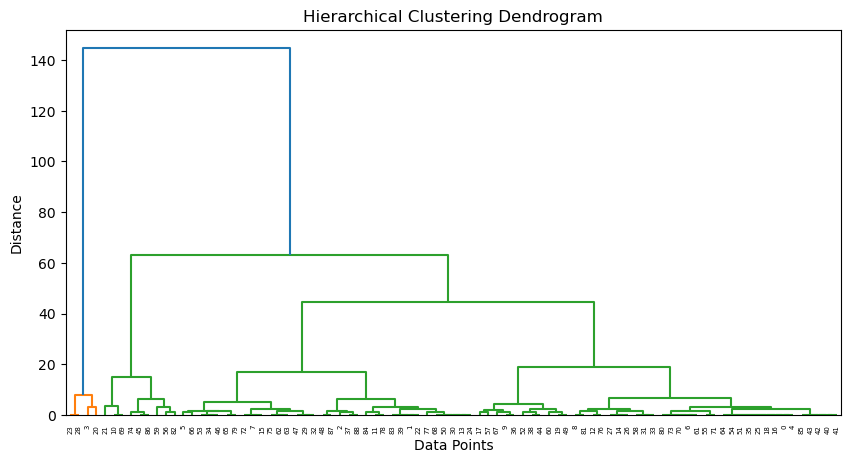

In [15]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [20]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin = davies_bouldin_score(dataset[X], dataset['cluster'])
print(f"Score Davies Bouldin : {davies_bouldin:.4f}")

Score Davies Bouldin : 0.1441
